# Major Project
# Sentiment Analysis

Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text. This is a popular way for organizations to determine and categorize opinions about a product, service, or idea.


It help organizations gather insights from unorganized and unstructured text that comes from online sources such as emails, blog posts, support tickets, web chats, social media channels, forums and comments. In addition to identifying sentiment, opinion mining can extract the polarity (or the amount of positivity and negativity), subject and opinion holder within the text

# Twitter Sentiments

Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.Twitter allows businesses to engage personally with consumers.


However, there’s so much data on Twitter that it can be hard for brands to prioritize which tweets or mentions to respond to first.

That's why sentiment analysis has become a key instrument in social media marketing strategies.



# preprocessing the data

In [1]:
import pandas as pd

In [2]:
df=pd.read_table("E:\Verzeo\Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### 1 - positive review
### 0 - negative review

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


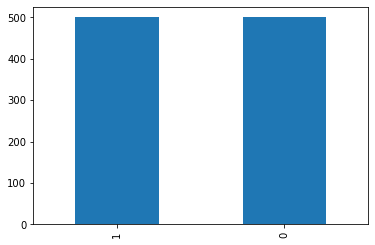

In [4]:
df['Liked'].value_counts().plot(kind='bar') # the dataset is balanced

### I/O

In [5]:
x=df['Review'].values  # input data
y=df['Liked'].values   # output data

# train_test_split

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test=train_test_split(x,y, random_state=0)

In [7]:
x_train.size

750

In [8]:
x_test.size

250

In [9]:
y_train.size

750

In [10]:
y_test.size

250

# Count Vectorizer(Bag Of Words)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 

In [12]:
count_vect=CountVectorizer(stop_words='english')

In [13]:
x_train_vect=count_vect.fit_transform(x_train)
x_test_vect=count_vect.transform(x_test)

In [14]:
x_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
x_test_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Training and testing the model using SVM

In [16]:
from sklearn.svm import SVC

In [17]:
model1=SVC() # calling Support Vector Classifier 

In [18]:
model1.fit(x_train_vect,y_train)

SVC()

In [19]:
y_pred1= model1.predict(x_test_vect)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [20]:
# x_test

### Accuracy

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.72

### The accuracy score of SVM is 0.72

### SVM with Pipeline 

In [22]:
from sklearn.pipeline import make_pipeline

In [23]:
model2=make_pipeline(CountVectorizer(),SVC()) 

In [24]:
model2.fit(x_train,y_train) # training the model

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [25]:
y_pred2=model2.predict(x_test) 
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

### Accuracy

In [26]:
accuracy_score(y_pred2,y_test)

0.792

### Therefore, the accuracy score of SVM with Pipeline is 0.792

# Training and testing the model using Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()

In [28]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [29]:
y_pred3=model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

### Accuracy

In [30]:
accuracy_score(y_pred3, y_test)

0.744

### The accuracy of Naive Bayes is 0.744 

### Naive Bayes with Pipeline

In [31]:
model4=make_pipeline(CountVectorizer(), MultinomialNB())

In [32]:
model4.fit(x_train,y_train) # training the model

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [33]:
y_pred4=model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

### Accuracy

In [34]:
accuracy_score(y_pred4,y_test)

0.784

### Therefore, the accuracy score of Naive Bayes with Pipeline is 0.784

# Creating the DataFrame for accuracies

In [35]:
accuracy1=[accuracy_score(y_pred1,y_test)]  #SVM
accuracy2=[accuracy_score(y_pred2,y_test)]  #SVM with Pipeline
accuracy3=[accuracy_score(y_pred3,y_test)]  #Naive Bayes
accuracy4=[accuracy_score(y_pred4,y_test)]  #naive Bayes with Pipeline

In [36]:
dct={"model1":pd.Series(accuracy1,["accuracy"]) ,"model2":pd.Series(accuracy2,["accuracy"]), "model3":pd.Series(accuracy3,["accuracy"]),"model4":pd.Series(accuracy4,["accuracy"])}
dct=pd.DataFrame(dct)
dct

,model1,model2,model3,model4
accuracy,0.72,0.792,0.744,0.784


### SVM with Pipeline(model2) has highest accuracy of 0.792

# Saving the model with highest accuracy using "joblib" 

In [37]:
import joblib

In [38]:
joblib.dump(model2,"sentiment analysis")

['sentiment analysis']

### loading the file contaning saved model

In [39]:
import joblib
saved_model=joblib.load("sentiment analysis")

### predicting the output

In [42]:
print(saved_model.predict(["service at your restaurant is worse"])) 

[0]


1 - indicates "positive" review

In [41]:
print(saved_model.predict(["service at your restaurant is bad"])) 

[0]


0 - indicates "negative" review